In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
data = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_binary.csv")

In [14]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
2,Adelie,Biscoe,44.907998,25.894140,204,3665,female
3,Adelie,Dream,26.304201,13.736113,160,8000,male
4,Adelie,Biscoe,54.870708,14.800691,210,5418,male


In [15]:
data.shape

(1201, 7)

In [16]:
input = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex','species','island']]
input.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,island
0,51.211594,10.784101,198,6536,female,Gentoo,Biscoe
1,54.473814,16.435158,208,4077,female,Gentoo,Biscoe
2,44.907998,25.894140,204,3665,female,Adelie,Biscoe
3,26.304201,13.736113,160,8000,male,Adelie,Dream
4,54.870708,14.800691,210,5418,male,Adelie,Biscoe


In [17]:
LE = LabelEncoder()

In [18]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Create new columns for encoded values
input['Species_n'] = LE.fit_transform(input['species'])
input['Island_n']  = LE.fit_transform(input['island'])
input['Sex_n'] = LE.fit_transform(input['sex'])

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_29740\1059042608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Species_n'] = LE.fit_transform(input['species'])
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_29740\1059042608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Island_n']  = LE.fit_transform(input['island'])
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_29740\1059042608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [19]:
input

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,island,Species_n,Island_n,Sex_n
0,51.211594,10.784101,198,6536,female,Gentoo,Biscoe,1,0,0
1,54.473814,16.435158,208,4077,female,Gentoo,Biscoe,1,0,0
2,44.907998,25.894140,204,3665,female,Adelie,Biscoe,0,0,0
3,26.304201,13.736113,160,8000,male,Adelie,Dream,0,1,1
4,54.870708,14.800691,210,5418,male,Adelie,Biscoe,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1196,39.129537,15.963502,226,3325,female,Gentoo,Biscoe,1,0,0
1197,31.841796,21.379096,181,4030,female,Adelie,Biscoe,0,0,0
1198,41.027337,29.101908,213,4013,female,Adelie,Torgersen,0,2,0
1199,47.544529,16.402925,210,5488,female,Gentoo,Biscoe,1,0,0


In [20]:
input.drop(axis=1,columns='sex',inplace=True)
input.drop(axis=1,columns='species',inplace=True)
input.drop(axis=1,columns='island',inplace=True)

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_29740\3900912574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.drop(axis=1,columns='sex',inplace=True)
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_29740\3900912574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.drop(axis=1,columns='species',inplace=True)


In [21]:
input.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,Island_n,Sex_n
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,43.509546,18.020463,202.298085,4322.581182,0.437136,0.544546,0.516236
std,9.012605,7.875648,22.450042,1315.708979,0.496239,0.779886,0.499944
min,25.000000,10.000000,160.000000,2000.000000,0.000000,0.000000,0.000000
25%,36.924317,14.539560,186.000000,3360.000000,0.000000,0.000000,0.000000
50%,42.954303,16.791121,201.000000,4254.000000,0.000000,0.000000,1.000000
75%,49.555848,19.290135,218.000000,5169.000000,1.000000,1.000000,1.000000
max,70.000000,91.000000,260.000000,8000.000000,1.000000,2.000000,1.000000


In [22]:
#input = input.dropna(axis = 0)
input = input.fillna(input.mean())

In [23]:
features = input[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']]
features.shape

(1201, 6)

In [24]:
target=input[['Species_n']]
target.shape

(1201, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.30, random_state= 7)

In [26]:
X_test.shape

(361, 6)

In [27]:
model = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [29]:
model.score(X_train, y_train)

0.9857142857142858

In [30]:
model.score(X_test, y_test)

0.9168975069252078

In [31]:
model.feature_importances_

array([0.23253582, 0.0534214 , 0.12276719, 0.12303409, 0.00336867,
       0.46487283])

In [32]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Sex_n,Island_n
1070,44.870268,20.879529,187,2868,0,1
855,30.178809,15.468290,182,3798,0,1
367,32.729622,10.000000,180,2000,1,0
141,49.214307,15.837277,230,5396,1,0
669,39.790084,18.820560,174,2991,0,1
...,...,...,...,...,...,...
828,49.446556,17.746454,206,5283,0,0
474,47.881000,13.108415,227,5396,1,0
941,60.999989,10.000000,228,2000,1,0
1095,43.847946,16.907949,186,5281,0,2


In [33]:
y_test

,Species_n
1070,0
855,0
367,0
141,1
669,0
...,...
828,1
474,1
941,1
1095,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
import pandas as pd

# Assuming you already have your encoded dataset
# Features and target
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']
y = input['Species_n']   # encoded species column (target)

# Loop through all feature combinations
for r in range(1, len(features)+1):
    for subset in combinations(features, r):
        X = input[list(subset)]
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Build Decision Tree classifier
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Print test accuracy
        print(subset, "->", model.score(X_test, y_test))


('bill_length_mm',) -> 0.6952908587257618
('bill_depth_mm',) -> 0.6094182825484764
('flipper_length_mm',) -> 0.8199445983379502
('body_mass_g',) -> 0.6537396121883656
('Sex_n',) -> 0.6066481994459834
('Island_n',) -> 0.8033240997229917
('bill_length_mm', 'bill_depth_mm') -> 0.775623268698061
('bill_length_mm', 'flipper_length_mm') -> 0.8365650969529086
('bill_length_mm', 'body_mass_g') -> 0.7922437673130194
('bill_length_mm', 'Sex_n') -> 0.6925207756232687
('bill_length_mm', 'Island_n') -> 0.8310249307479224
('bill_depth_mm', 'flipper_length_mm') -> 0.7673130193905817
('bill_depth_mm', 'body_mass_g') -> 0.7368421052631579
('bill_depth_mm', 'Sex_n') -> 0.6094182825484764
('bill_depth_mm', 'Island_n') -> 0.814404432132964
('flipper_length_mm', 'body_mass_g') -> 0.778393351800554
('flipper_length_mm', 'Sex_n') -> 0.7728531855955678
('flipper_length_mm', 'Island_n') -> 0.8753462603878116
('body_mass_g', 'Sex_n') -> 0.6537396121883656
('body_mass_g', 'Island_n') -> 0.8033240997229917
('Sex_

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
import pandas as pd

# Features and target
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']
y = input['Species_n']   # encoded species column (target)

results = []  # to store (accuracy, subset)

# Loop through all feature combinations
for r in range(1, len(features)+1):
    for subset in combinations(features, r):
        X = input[list(subset)]
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Build Decision Tree classifier
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Store accuracy
        acc = model.score(X_test, y_test)
        results.append((acc, subset))

# Sort results by accuracy (descending)
results.sort(reverse=True, key=lambda x: x[0])

# Print neatly
for acc, subset in results:
    print(f"{subset} -> {acc:.4f}")


('bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'Island_n') -> 0.9280
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'Island_n') -> 0.9224
('bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.9224
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.9197
('bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'Island_n') -> 0.9058
('bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.9058
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'Sex_n', 'Island_n') -> 0.9030
('bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'Island_n') -> 0.9003
('bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.8947
('bill_length_mm', 'body_mass_g', 'Island_n') -> 0.8892
('bill_length_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.8809
('flipper_length_mm', 'body_mass_g', 'Island_n') -> 0.8781
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',

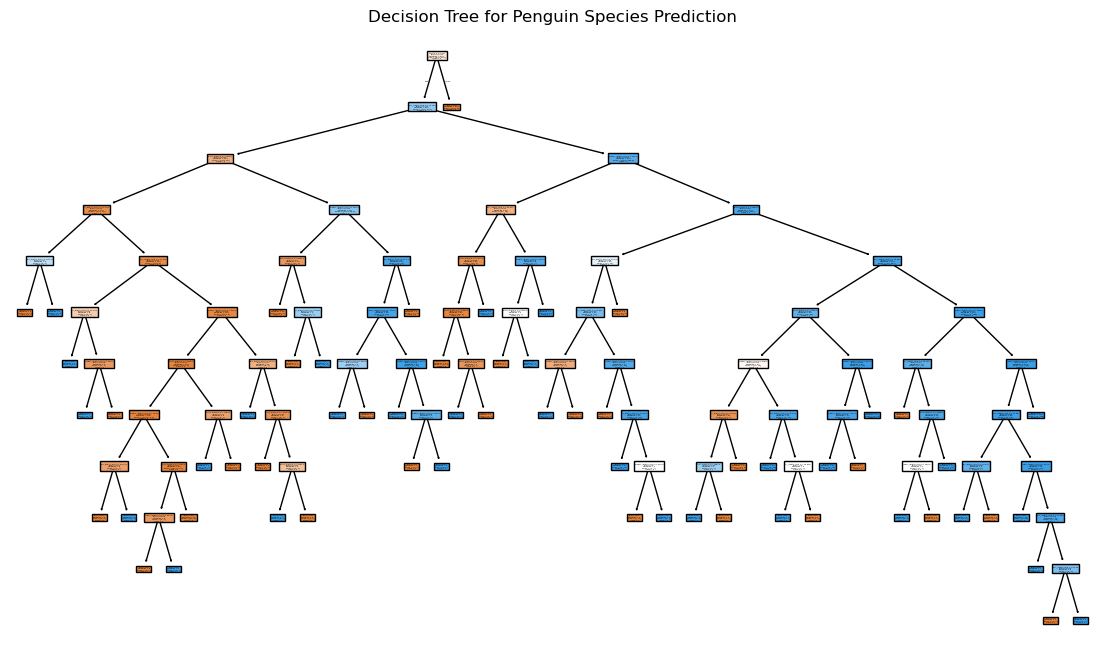

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the data
# Step 2: Select features and target
features = input[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']]

# Replace 'Target' with the actual target column name in your CSV (e.g., 'Kidney_Disease')
target = input['Species_n'] 

# Step 3: Split the dataset (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(
    clf, 
    feature_names=features.columns.tolist(),  # <-- convert to list
    class_names=[str(cls) for cls in clf.classes_],
    filled=True
)

plt.title("Decision Tree for Penguin Species Prediction")
plt.show()

